In [66]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


![](https://raw.githubusercontent.com/UGS-CS/CSC3009/master/mashead.svg)

# <center>**Team 16**</center>

In [67]:
# import libaries
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import defaultdict

## **1. Exploratory data analysis**

In [68]:
# Define paths
DATASET_PATH = "drive/MyDrive/dataset"

CLASSES = ['glioma', 'meningioma', 'notumor', 'pituitary']

Starting EDA on dataset at: drive/MyDrive/dataset

## 1. Class Distribution
---
Training Set Counts: {'glioma': 120, 'meningioma': 120, 'notumor': 120, 'pituitary': 120}
Test Set Counts: {'glioma': 120, 'meningioma': 120, 'notumor': 120, 'pituitary': 120}


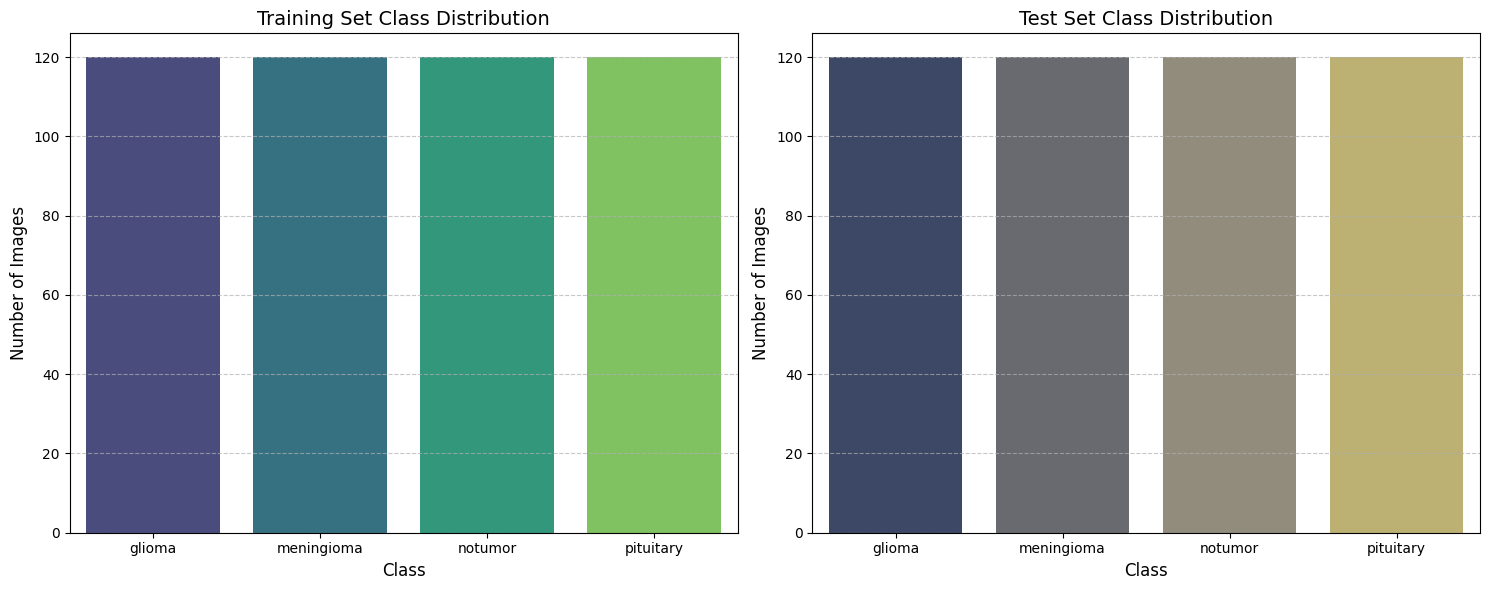


## 2. Image Size Analysis
---
  Processing image sizes for: training/glioma
  Processing image sizes for: training/meningioma
  Processing image sizes for: training/notumor
  Processing image sizes for: training/pituitary
  Processing image sizes for: test/glioma
  Processing image sizes for: test/meningioma
  Processing image sizes for: test/notumor
  Processing image sizes for: test/pituitary

Processed sizes for 960 images.

Image Size Summary (Height x Width):
            Height        Width
count   960.000000   960.000000
mean    452.014583   448.407292
std     124.663835   129.302499
min     168.000000   150.000000
25%     435.250000   414.500000
50%     512.000000   512.000000
75%     512.000000   512.000000
max    1019.000000  1149.000000


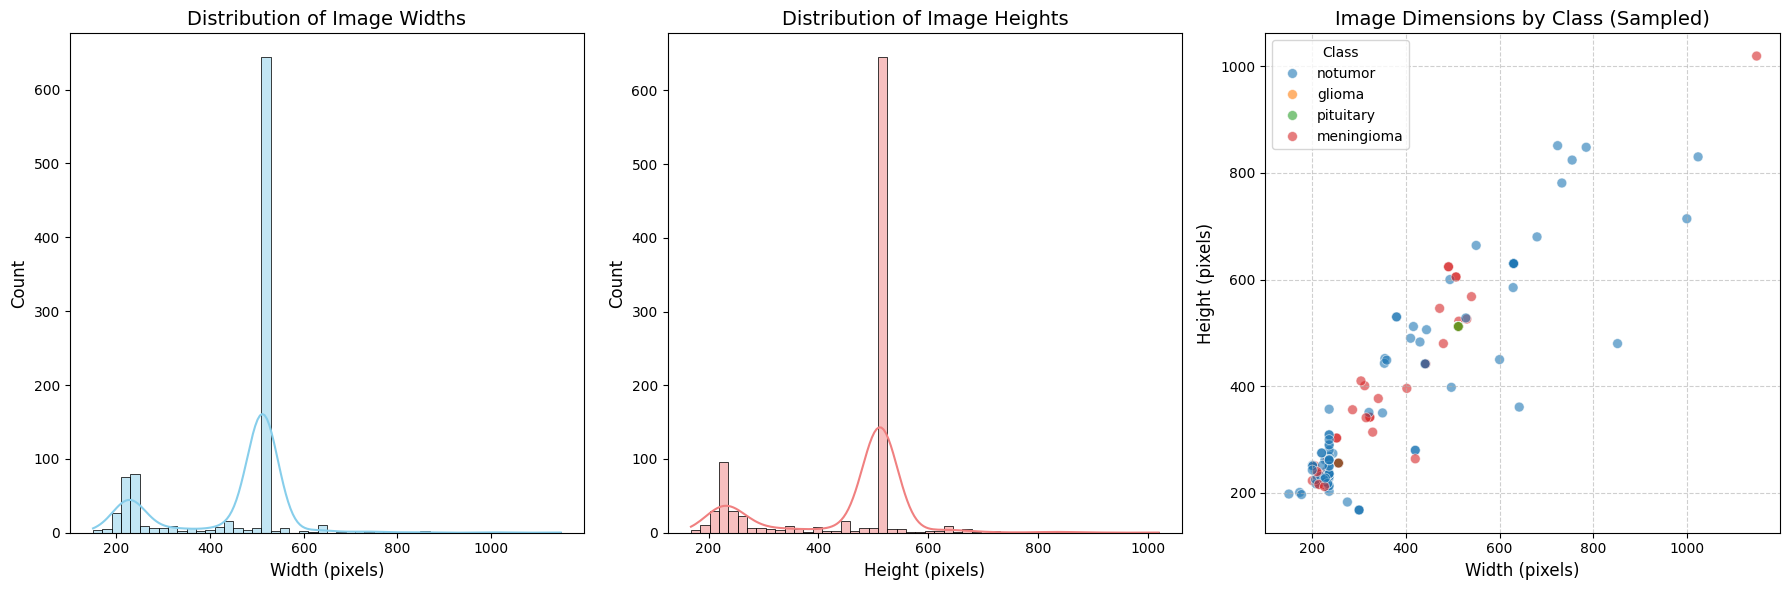

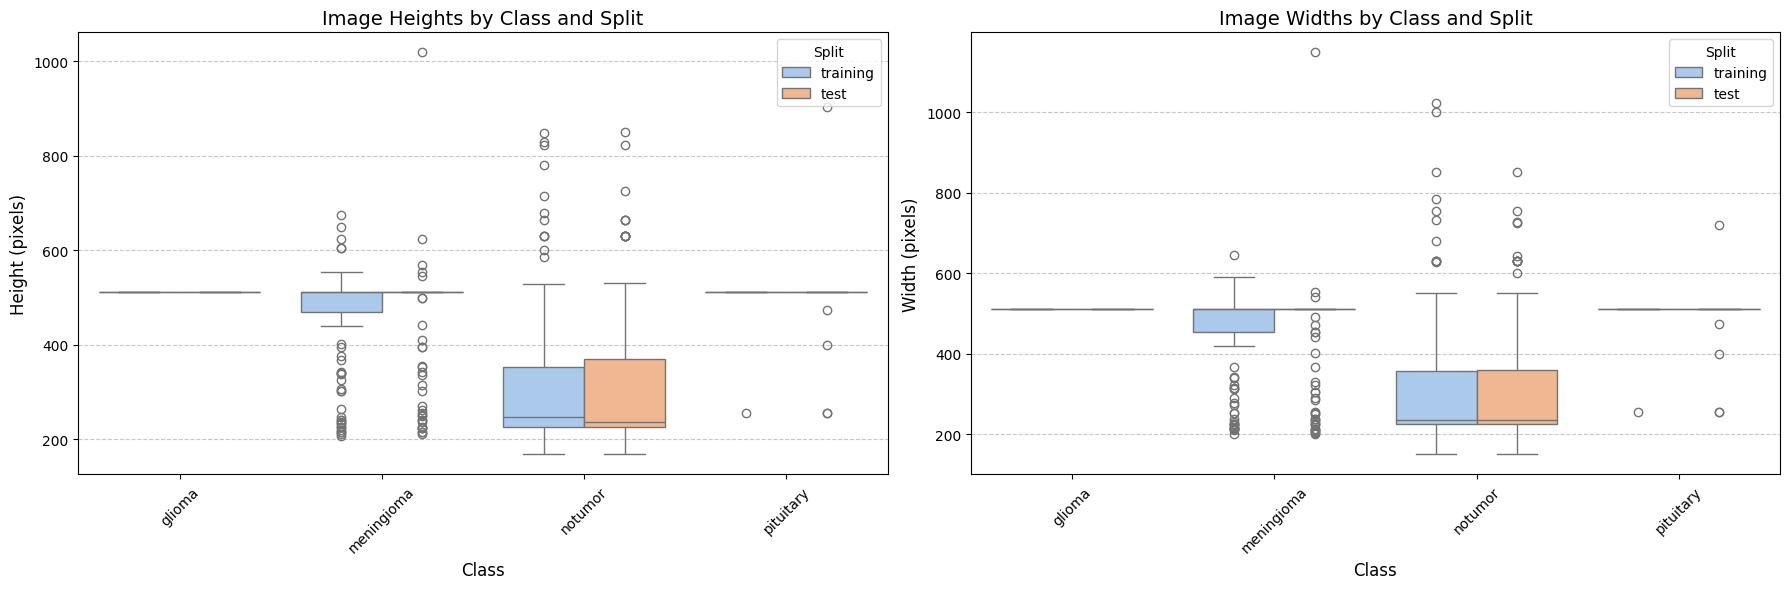


## 3. Image Overlap Check
---
  Attempting to list image IDs from: drive/MyDrive/dataset/training/dataset_16/glioma
    Found 120 unique IDs for training_glioma
  Attempting to list image IDs from: drive/MyDrive/dataset/training/dataset_16/meningioma
    Found 120 unique IDs for training_meningioma
  Attempting to list image IDs from: drive/MyDrive/dataset/training/dataset_16/notumor
    Found 120 unique IDs for training_notumor
  Attempting to list image IDs from: drive/MyDrive/dataset/training/dataset_16/pituitary
    Found 120 unique IDs for training_pituitary
  Attempting to list image IDs from: drive/MyDrive/dataset/test/glioma
    Found 120 unique IDs for test_glioma
  Attempting to list image IDs from: drive/MyDrive/dataset/test/meningioma
    Found 120 unique IDs for test_meningioma
  Attempting to list image IDs from: drive/MyDrive/dataset/test/notumor
    Found 120 unique IDs for test_notumor
  Attempting to list image IDs from: drive/MyDrive/dataset/test/pituitary
    Found

In [69]:
def eda_analysis():
    print(f"Starting EDA on dataset at: {DATASET_PATH}\n")

    # --- 1. Class Distribution ---
    print("## 1. Class Distribution")
    print("---")
    train_counts = {}
    test_counts = {}

    for cls in CLASSES:
        train_path = os.path.join(DATASET_PATH, 'training', 'dataset_16', cls)
        test_path = os.path.join(DATASET_PATH, 'test', cls) # Assuming no 'dataset_16' for test

        if os.path.exists(train_path):
            train_counts[cls] = len(os.listdir(train_path))
        else:
            print(f"Warning: Training directory not found for {cls}: {train_path}")
            train_counts[cls] = 0

        if os.path.exists(test_path):
            test_counts[cls] = len(os.listdir(test_path))
        else:
            print(f"Warning: Test directory not found for {cls}: {test_path}")
            test_counts[cls] = 0

    print("Training Set Counts:", train_counts)
    print("Test Set Counts:", test_counts)

    # Visualization for Class Distribution
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), palette='viridis', hue=list(train_counts.keys()), legend=False)
    plt.title("Training Set Class Distribution", fontsize=14)
    plt.xlabel("Class", fontsize=12)
    plt.ylabel("Number of Images", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.subplot(1, 2, 2)
    sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()), palette='cividis', hue=list(test_counts.keys()), legend=False)
    plt.title("Test Set Class Distribution", fontsize=14)
    plt.xlabel("Class", fontsize=12)
    plt.ylabel("Number of Images", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # --- 2. Image Size Analysis ---
    print("\n## 2. Image Size Analysis")
    print("---")
    size_stats = defaultdict(list) # Stores (height, width) tuples
    total_images_processed = 0

    for split in ['training', 'test']:
        for cls in CLASSES:
            current_image_dir = ""
            if split == 'training':
                current_image_dir = os.path.join(DATASET_PATH, split, 'dataset_16', cls)
            elif split == 'test':
                # CONFIRM THIS PATH FOR TEST SET:
                current_image_dir = os.path.join(DATASET_PATH, split, cls)
                # If test also has 'dataset_16':
                # current_image_dir = os.path.join(DATASET_PATH, split, 'dataset_16', cls)

            print(f"  Processing image sizes for: {split}/{cls}")
            if not os.path.exists(current_image_dir):
                print(f"    Warning: Directory not found: {current_image_dir}. Skipping.")
                continue

            for img_name in os.listdir(current_image_dir):
                img_path = os.path.join(current_image_dir, img_name)
                if os.path.isfile(img_path): # Ensure it's a file
                    try:
                        img_raw = tf.io.read_file(img_path)
                        img_tensor = tf.image.decode_image(img_raw, channels=3)

                        if len(img_tensor.shape) >= 2: # Ensure it has at least height and width
                             size_stats[f"{split}_{cls}"].append((img_tensor.shape[0], img_tensor.shape[1]))
                        else:
                            print(f"    Warning: Unexpected shape for image {img_name}: {img_tensor.shape}. Skipping.")

                        total_images_processed += 1
                    except tf.errors.InvalidArgumentError as e:
                        print(f"    Warning: Could not decode image {img_name} in {split}/{cls}. Error: {e}")
                    except Exception as e:
                        print(f"    Warning: Error processing {img_name} in {split}/{cls}. Error: {e}")

    print(f"\nProcessed sizes for {total_images_processed} images.")

    # Analyze and visualize sizes
    all_widths = []
    all_heights = []

    # Convert size stats to a DataFrame for easier plotting
    size_df_data = []
    for key, sizes_list in size_stats.items():
        split_name, class_name = key.split('_')
        for h, w in sizes_list:
            size_df_data.append({'Split': split_name, 'Class': class_name, 'Height': h, 'Width': w})
            all_widths.append(w)
            all_heights.append(h)

    if size_df_data:
        size_df = pd.DataFrame(size_df_data)

        print("\nImage Size Summary (Height x Width):")
        print(size_df[['Height', 'Width']].describe())

        plt.figure(figsize=(18, 6))

        plt.subplot(1, 3, 1)
        sns.histplot(all_widths, bins=50, kde=True, color='skyblue')
        plt.title("Distribution of Image Widths", fontsize=14)
        plt.xlabel("Width (pixels)", fontsize=12)
        plt.ylabel("Count", fontsize=12)

        plt.subplot(1, 3, 2)
        sns.histplot(all_heights, bins=50, kde=True, color='lightcoral')
        plt.title("Distribution of Image Heights", fontsize=14)
        plt.xlabel("Height (pixels)", fontsize=12)
        plt.ylabel("Count", fontsize=12)

        plt.subplot(1, 3, 3)
        # Sample for scatter plot if too many points
        sample_df = size_df.sample(min(500, len(size_df))) if len(size_df) > 500 else size_df
        sns.scatterplot(data=sample_df, x='Width', y='Height', hue='Class', alpha=0.6, s=50, palette='tab10')
        plt.title("Image Dimensions by Class (Sampled)", fontsize=14)
        plt.xlabel("Width (pixels)", fontsize=12)
        plt.ylabel("Height (pixels)", fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

        # Box plot for sizes by class
        plt.figure(figsize=(18, 6))
        plt.subplot(1, 2, 1)
        sns.boxplot(data=size_df, x='Class', y='Height', hue='Split', palette='pastel')
        plt.title("Image Heights by Class and Split", fontsize=14)
        plt.xlabel("Class", fontsize=12)
        plt.ylabel("Height (pixels)", fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        plt.subplot(1, 2, 2)
        sns.boxplot(data=size_df, x='Class', y='Width', hue='Split', palette='pastel')
        plt.title("Image Widths by Class and Split", fontsize=14)
        plt.xlabel("Class", fontsize=12)
        plt.ylabel("Width (pixels)", fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    else:
        print("No image size data collected. Ensure paths are correct and images are present.")


    # --- 3. Image Overlap Check ---
    print("\n## 3. Image Overlap Check")
    print("---")
    image_ids = {} # Stores sets of IDs for each split_class combination

    for split in ['training', 'test']:
        for cls in CLASSES:
            current_image_dir = ""
            if split == 'training':
                current_image_dir = os.path.join(DATASET_PATH, split, 'dataset_16', cls)
            elif split == 'test':
                # CONFIRM THIS PATH FOR TEST SET:
                current_image_dir = os.path.join(DATASET_PATH, split, cls)
                # If test also has 'dataset_16':
                # current_image_dir = os.path.join(DATASET_PATH, split, 'dataset_16', cls)

            print(f"  Attempting to list image IDs from: {current_image_dir}")

            if os.path.exists(current_image_dir):
                ids = set()
                try:
                    for f in os.listdir(current_image_dir):
                        file_path = os.path.join(current_image_dir, f)
                        if os.path.isfile(file_path):
                            # CORRECTED LINE: Use the full filename without extension as the ID
                            ids.add(os.path.splitext(f)[0])
                except Exception as e:
                    print(f"    Error listing files in {current_image_dir}: {e}")
                    ids = set()

                image_ids[f"{split}_{cls}"] = ids
                print(f"    Found {len(ids)} unique IDs for {split}_{cls}")
            else:
                print(f"    Warning: Directory not found for image ID check: {current_image_dir}. Skipping {split}/{cls}.")
                image_ids[f"{split}_{cls}"] = set()

    # --- Compare Training and Test Sets for Overall Overlap ---
    print("\n--- Comparing Training and Test Sets for Overall Overlap ---")

    all_train_ids = set()
    for cls in CLASSES:
        all_train_ids.update(image_ids.get(f"training_{cls}", set()))

    all_test_ids = set()
    for cls in CLASSES:
        all_test_ids.update(image_ids.get(f"test_{cls}", set()))

    overall_overlap = all_train_ids.intersection(all_test_ids)

    print(f"Total unique IDs in Training Set: {len(all_train_ids)}")
    print(f"Total unique IDs in Test Set:     {len(all_test_ids)}")
    print(f"Total unique IDs overlapping between Training and Test Sets: {len(overall_overlap)}")

    if len(overall_overlap) > 0:
        print(f"  Example overlapping IDs: {list(overall_overlap)[:5]} (showing up to 5 examples)")
        print("\n  **WARNING: OVERLAP DETECTED!** This means some images (or their direct variations) are present in both training and test sets.")
        print("  This can lead to **overly optimistic model performance metrics** during evaluation.")
        print("  Consider re-splitting your dataset to ensure strict separation between training and test data if this is unintentional.")
    else:
        print("  No overlap detected between training and test sets. This is ideal for robust model evaluation.")

    print("\nEDA Complete!")

# Execute the analysis
# Remember to mount Google Drive if you are in Colab:
# from google.colab import drive
# drive.mount('/content/drive')
eda_analysis()

## **2. Data preparation and pre-processing**

###Standardize Image Sizes
To have all images same size and pixels to ensure consistency in the data.

In [70]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)  # Standard size for CNNs
BATCH_SIZE = 32  # Number of images per batch

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixels to [0,1]
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, 'training', 'dataset_16'),
    target_size=IMG_SIZE,  # Resize to 224x224
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # For multi-class classification
    classes=CLASSES  # Ensure correct class order
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, 'test'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES,
    shuffle=False  # Keep order for evaluation
)

#target_size=IMG_SIZE resizes all images to 224x224.
#rescale=1./255 normalizes pixel values from [0,255] to [0,1], which is standard for neural networks.
#class_mode='categorical' creates one-hot encoded labels (e.g., [1,0,0,0] for glioma).
#classes=CLASSES ensures consistent label order.

#Check the output of train_generator and test_generator to confirm the number of images loaded matches train_counts and test_counts from the EDA

Found 480 images belonging to 4 classes.
Found 480 images belonging to 4 classes.


###Handle Class Imbalance
Check if theres a mismatch in counts according to eda. If a class has more, the weights should be adjusted. In this case, all classes are equal hence weights are all 1.0.

In [71]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

train_counts = {'glioma': 120, 'meningioma': 120, 'notumor': 120, 'pituitary': 120}
class_names = list(train_counts.keys())
class_counts = list(train_counts.values())

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array(class_names),
    y=np.repeat(class_names, class_counts)
)
class_weight_dict = dict(enumerate(class_weights))

print("Class Weights:", class_weight_dict)

Class Weights: {0: np.float64(1.0), 1: np.float64(1.0), 2: np.float64(1.0), 3: np.float64(1.0)}


### Data Augmentation
Apply data augmentation to the training set to increase dataset diversity and prevent overfitting. This is especially important for medical imaging tasks like brain tumor classification, where data may be limited.

In [72]:
# Augmentation creates varied versions of training images (e.g., rotated or flipped) to make the model more robust.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Rotate images up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20%
    height_shift_range=0.2,  # Shift images vertically by up to 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    zoom_range=0.2,  # Random zoom
    fill_mode='nearest'  # Fill missing pixels
)

# Update train_generator with augmentation
train_generator = train_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, 'training', 'dataset_16'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES
)

# Test generator remains the same (no augmentation)
test_generator = test_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, 'test'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES,
    shuffle=False
)


Found 480 images belonging to 4 classes.
Found 480 images belonging to 4 classes.


### Verify Preprocessed Data

Training images: 480
Test images: 480
Class indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


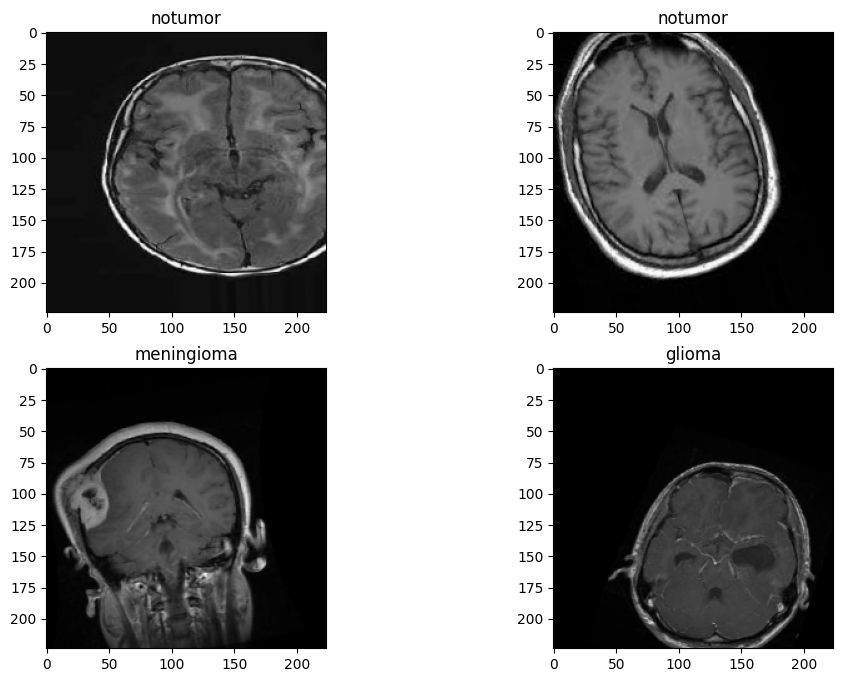

In [73]:
print(f"Training images: {train_generator.samples}")
print(f"Test images: {test_generator.samples}")
print(f"Class indices: {train_generator.class_indices}")

# Visualize a batch
x, y = next(train_generator)
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(x[i])
    plt.title(CLASSES[np.argmax(y[i])])
plt.show()

#<font color=lightgreen> TESTING ONLY </font>

In [75]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(*IMG_SIZE, 3))
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(len(CLASSES), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    class_weight=class_weight_dict
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 24s 955ms/step - accuracy: 0.2923 - loss: 1.5628 - val_accuracy: 0.3083 - val_loss: 1.4526
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 708ms/step - accuracy: 0.3035 - loss: 1.4012 - val_accuracy: 0.3875 - val_loss: 1.3010
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 676ms/step - accuracy: 0.4305 - loss: 1.2472 - val_accuracy: 0.4479 - val_loss: 1.2011
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 627ms/step - accuracy: 0.3519 - loss: 1.3206 - val_accuracy: 0.3688 - val_loss: 1.3656
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 703ms/step - accuracy: 0.3757 - loss: 1.2812 - val_accuracy: 0.4708 - val_loss: 1.1491
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 702ms/step - accuracy: 0.4431 - loss: 1.1777 - val_accuracy: 0.3938 - val_loss: 1.2334
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 688ms/step - accuracy: 0.4671 - loss: 1.1727 - val_accuracy: 0.4750 - val_loss: 1.1446
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 625ms/step - accuracy: 0.5079 - loss: 1.1503 - val_accura